In [0]:
from keras.datasets import fashion_mnist
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from sklearn import metrics
from keras.layers import Input, Dense
from sklearn.metrics import confusion_matrix
from keras.models import Model, Sequential
from sklearn.mixture import GaussianMixture

(xtrain, ytrain), (xtest,ytest) = fashion_mnist.load_data()

x = xtrain
y = ytrain
x = x.astype(np.float32)
xtest = xtest.astype(np.float32)
ytest = ytest.astype(np.float32)
x = x.reshape((x.shape[0], -1))
xtest = xtest.reshape((xtest.shape[0], -1))
x = np.divide(x, 255.)
xtest = np.divide(xtest, 255.)
print(x.shape)
clusters = KMeans(n_clusters = 10, n_init=20, n_jobs=4)

Using TensorFlow backend.


4423680/4422102 [==============================] - 0s 0us/step
(60000, 784)


In [0]:
clusters.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=20, n_jobs=4, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
##########################################################KMeans prediction
ypred_test = clusters.predict(xtest)
ypred_train = clusters.predict(x)
print("Part 1")
print("Testing Accuracy: ",metrics.adjusted_mutual_info_score(ytest,ypred_test))
print("Training Accuracy: ",metrics.adjusted_mutual_info_score(y,ypred_train))
print("Confusion Matrix: ")
print(confusion_matrix(ytest,ypred_test))

Part 1
Testing Accuracy:  0.500130986246911
Training Accuracy:  0.5003052797174995
Confusion Matrix: 
[[587   1   5  34 245   0   6   0  29  93]
 [ 50   0   0   9  29   0   0   0 890  22]
 [ 19   0   4 566 342   0   4   0   4  61]
 [277   0   3  10 113   0   2   0 503  92]
 [136   0   5 627 159   0   4   0  27  42]
 [  0 229   0   0   6  44   0  72   0 649]
 [189   0   0 311 358   0  15   0  12 115]
 [  0 791   0   0   0   2   0 145   0  62]
 [  3  42 408  62  36   1 351   7   6  84]
 [  0  26   2   0   4 408   0 531   0  29]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


In [0]:
indim = x.shape[1]
endim = 32
autoencoder = Sequential()
########################################################## Encoder Layers
autoencoder.add(Dense(4 * endim, input_shape=(indim,), activation='relu'))
autoencoder.add(Dense(2 * endim, activation='relu'))
autoencoder.add(Dense(endim, activation='relu'))
########################################################### Decoder Layers
autoencoder.add(Dense(2 * endim, activation='relu'))
autoencoder.add(Dense(4 * endim, activation='relu'))
autoencoder.add(Dense(indim, activation='sigmoid'))

In [0]:
input_img = Input(shape=(indim,))
##########################################################Encoder Layers Extracted
elayer1 = autoencoder.layers[0]
elayer2 = autoencoder.layers[1]
elayer3 = autoencoder.layers[2]
##########################################################Encoder Model Generated
encoder = Model(input_img, elayer3(elayer2(elayer1(input_img))))

In [0]:
##########################################################Autoencoder compiled
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
auto_train = autoencoder.fit(x, x,
                epochs=50,
                batch_size=256,
                validation_data = (xtest,xtest)
                )



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/50





60000/60000 [==============================] - 7s 111us/step - loss: 0.3746 - val_loss: 0.3181
Epoch 2/50
60000/60000 [==============================] - 2s 32us/step - loss: 0.3099 - val_loss: 0.3067
Epoch 3/50
60000/60000 [==============================] - 2s 32us/step - loss: 0.3014 - val_loss: 0.3004
Epoch 4/50
60000/60000 [==============================] - 2s 31us/step - loss: 0.2965 - val_loss: 0.2967
Epoch 5/50
60000/60000 [==============================] - 2s 32us/step - loss: 0.2936 - val_loss: 0.2952
Epoch 6/50
60000/60000 [==============================] - 2s 31us/step - loss: 0.2912 - val_loss: 0.2921
Epoch 7/50
60000/60000 [==============================] - 2s 31us/step - loss: 0.2892 - val_loss: 0.2907
Epoch 8/50
60000/60000 [==============================] - 2s 31us/step - loss: 0.2875 - val_loss: 0.2891
Epoch

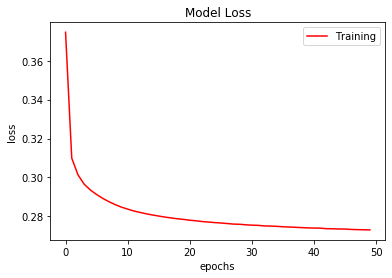

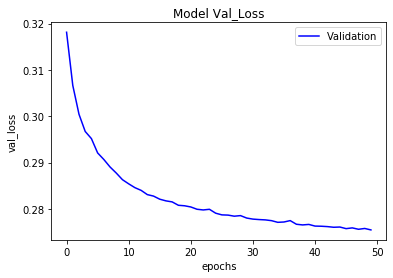

In [0]:
##########################################################Graph Plot Loss
plt.plot(auto_train.history['loss'], 'red')
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['Training'])
plt.show()
##########################################################Graph Plot Val_Loss
plt.plot(auto_train.history['val_loss'],'blue')
plt.title('Model Val_Loss')
plt.ylabel('val_loss')
plt.xlabel('epochs')
plt.legend(['Validation'])
plt.show()

In [0]:
##########################################Encoder Predictions to get Encoded Images
enimgs_test = encoder.predict(xtest)
enimgs_train = encoder.predict(x)

In [0]:
##########################################################KMeans on encoded images
clusters1 = KMeans(n_clusters = 10)
ypred_test1 = clusters1.fit_predict(enimgs_test)
ypred_train1 = clusters1.fit_predict(enimgs_train)
print("Part2")
print("Testing Accuracy For Part2 ",metrics.adjusted_mutual_info_score(ytest,ypred_test1))
print("Training Accuracy For Part2 ",metrics.adjusted_mutual_info_score(y,ypred_train1))
print("Confusion Matrix: ")
print(confusion_matrix(ytest,ypred_test1))


Part2
Testing Accuracy For Part2  0.43400321911186696
Training Accuracy For Part2  0.44161895842221616
Confusion Matrix: 
[[  1  30   0   1  63 275   0 607   0  23]
 [  0   6   0 581 324  45   0  40   0   4]
 [  0 369   0   0   5 309   0  13   0 304]
 [  0  20   0 115 531 137   0 135   0  62]
 [  0 303   0   0  69 123   0  16   0 489]
 [127   3 230   0   0 165 307   0 168   0]
 [  0 209   0   2  38 337   0 190   0 224]
 [297   0 301   0   0  16 382   0   4   0]
 [  2 481 173   0   6 225  22  42   0  49]
 [  1   1 466   0   0  32  18   0 482   0]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


In [0]:
##########################################################GMM on encoded images
cluster3 = GaussianMixture(n_components=10)
cluster_test3 = cluster3.fit(enimgs_test)
cluster_train3 = cluster3.fit(enimgs_train)
ypred_test3 = cluster_test3.predict(enimgs_test)
ypred_train3 = cluster_train3.predict(enimgs_train)
print("Part 3")
print("Testing Accuracy for Part3 ",metrics.adjusted_mutual_info_score(ytest,ypred_test3))
print("Training Accuracy for Part3 ",metrics.adjusted_mutual_info_score(y,ypred_train3))
print("Confusion Matrix: ")
print(confusion_matrix(ytest,ypred_test3))

Part 3
Testing Accuracy for Part3  0.538970186562524
Training Accuracy for Part3  0.5399667497890507
Confusion Matrix: 
[[  1   7   8   0   0   0  91 776 115   2]
 [  0  32   2   0   0 817   3 123  23   0]
 [  0   2 691   0   0   0  94  59 154   0]
 [  0 316   8   0   0   0  11 590  75   0]
 [  0  21 608   0   0   0  45 150 175   1]
 [359   0   0 359  39   0   0   0  20 223]
 [  2   8 394   0   0   0 136 322 137   1]
 [  4   0   0 619  49   0   0   0   3 325]
 [  3  22   4   0   0   0   5  30 901  35]
 [ 95   0   0   2 766   0   0   0   4 133]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
